In [44]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer #to fill missing vlaues
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
test_df = pd.read_csv(r"test_data.csv")
train_df = pd.read_csv(r"train_data.csv")

In [4]:
train_df.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40


In [5]:
train_df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [6]:
train_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
#drop insignificant columns
train_df.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [9]:
# Select the columns with missing values
cols_with_na = ['Bed Grade', 'City_Code_Patient']

# Create a KNNImputer object with k=11 for Bed Grade and k=67 for City_Code_Patient 
# these values were determined by calculating sqaure root of missing values
imputer = KNNImputer(n_neighbors=11, missing_values=np.nan)  # k=11 for Bed Grade
imputer_city = KNNImputer(n_neighbors=67, missing_values=np.nan)  # k=67 for City_Code_Patient

# Impute missing values using KNN imputation
train_df['Bed Grade'] = imputer.fit_transform(train_df[['Bed Grade']])
train_df['City_Code_Patient'] = imputer_city.fit_transform(train_df[['City_Code_Patient']])


<ipython-input-27-0a7a7e557c39>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


<Figure size 1080x576 with 0 Axes>

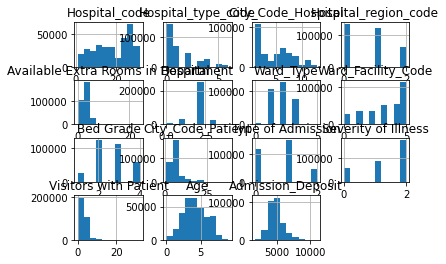

Skewness:
Hospital_code                       -0.280783
Hospital_type_code                   1.187839
City_Code_Hospital                   0.538809
Hospital_region_code                 0.389559
Available Extra Rooms in Hospital    0.971930
Department                          -0.910156
Ward_Type                            0.076436
Ward_Facility_Code                  -0.588457
Bed Grade                            0.051764
City_Code_Patient                    1.593113
Type of Admission                    0.312990
Severity of Illness                 -0.751319
Visitors with Patient                3.137125
Age                                  0.126715
Admission_Deposit                    0.931454
dtype: float64


In [27]:
# Define the figure size
plt.figure(figsize=(15,8))

# Create the histogram using Pandas hist method
train_df.drop('Stay', axis=1).hist()

# Add x and y labels
plt.xlabel('Variable')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of Training Data')

# Tighten the layout
plt.tight_layout()

# Display the plot
plt.show()

# Calculate and print the skewness
print('Skewness:')
print(train_df.drop('Stay', axis=1).skew())


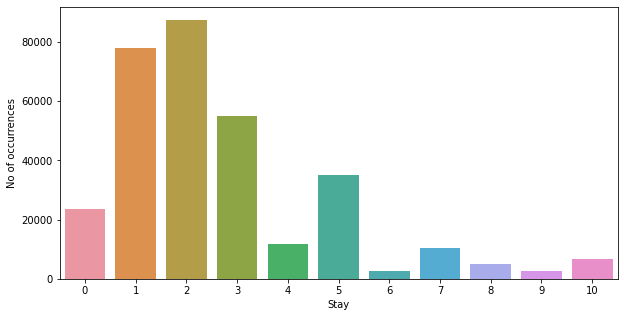

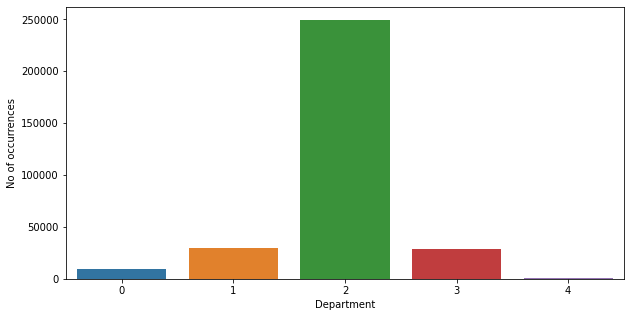

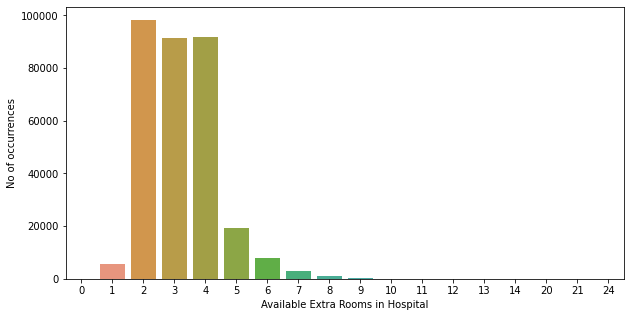

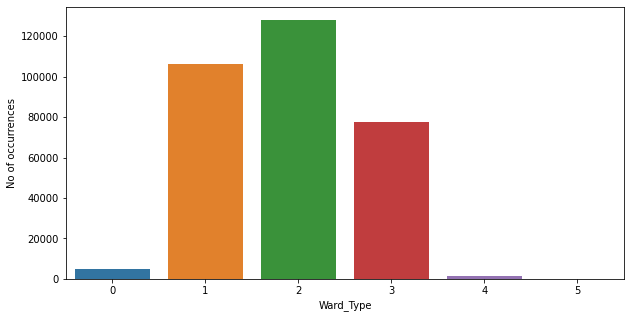

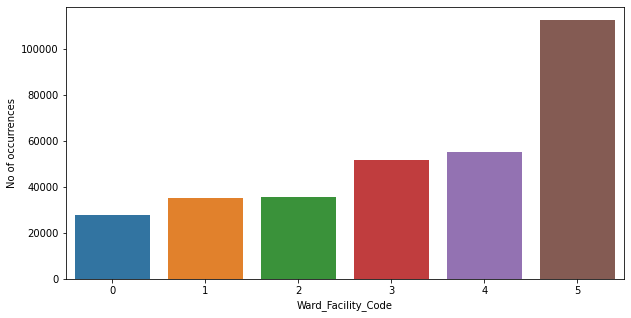

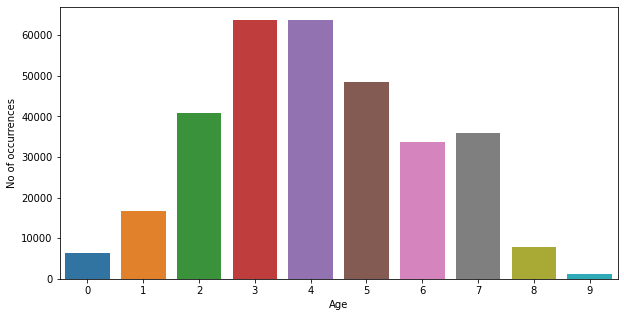

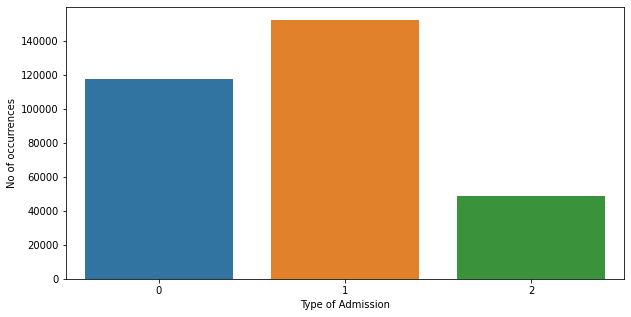

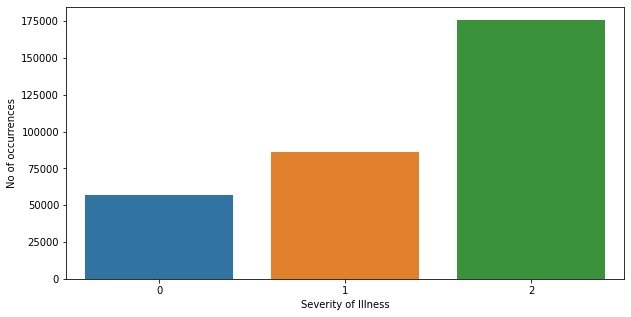

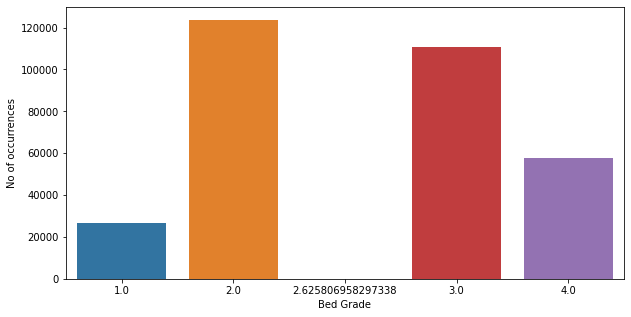

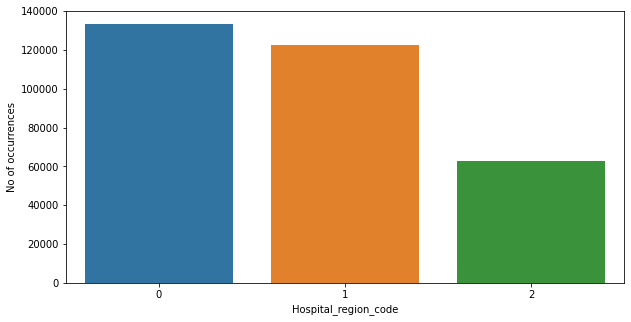

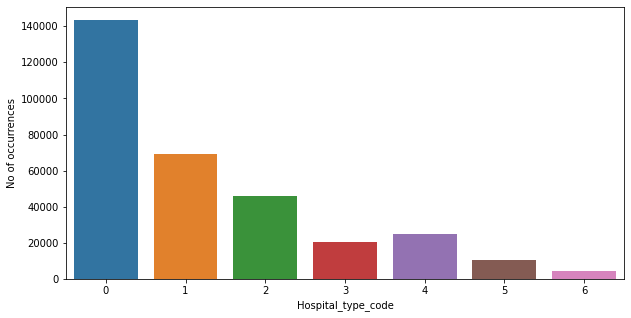

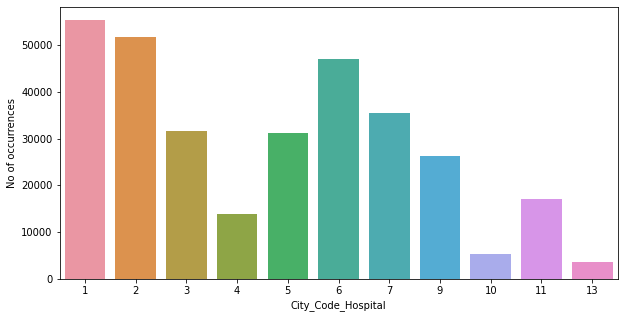

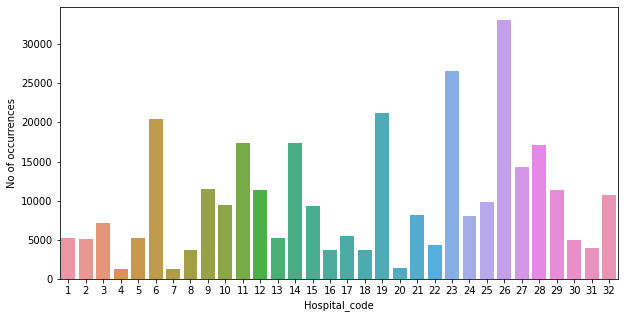

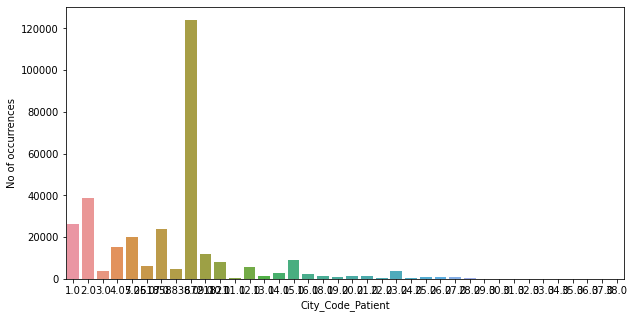

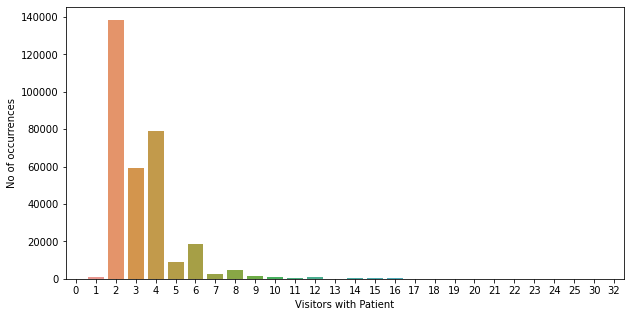

In [28]:
# Replace 'More than 100 Days' with '>100' in the 'Stay' column
train_df['Stay'].replace('More than 100 Days', '>100', inplace=True)

# Define the list of categorical columns to plot
cat_cols = [
    'Stay', 'Department', 'Available Extra Rooms in Hospital', 'Ward_Type',
    'Ward_Facility_Code', 'Age', 'Type of Admission', 'Severity of Illness',
    'Bed Grade', 'Hospital_region_code', 'Hospital_type_code',
    'City_Code_Hospital', 'Hospital_code', 'City_Code_Patient',
    'Visitors with Patient'
]

# Create the bar charts for each categorical column
for col in cat_cols:
    counts = train_df[col].value_counts()
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col, data=train_df)
    ax.set(xlabel=col, ylabel='No of occurrences')
    plt.show()

**Bivariate Analysis**

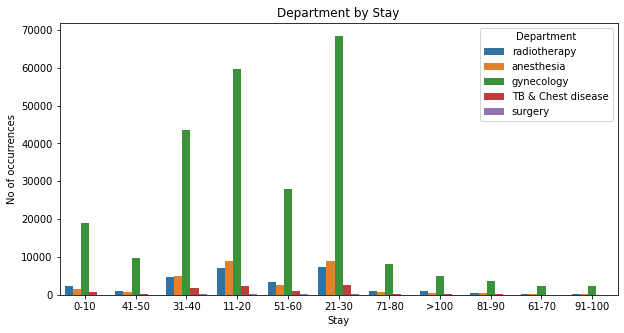

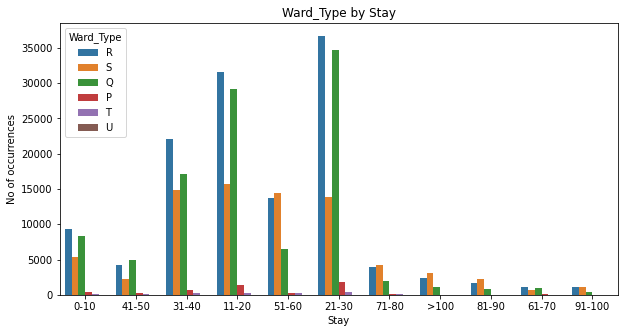

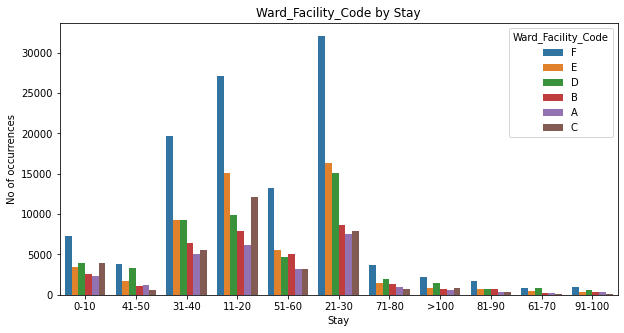

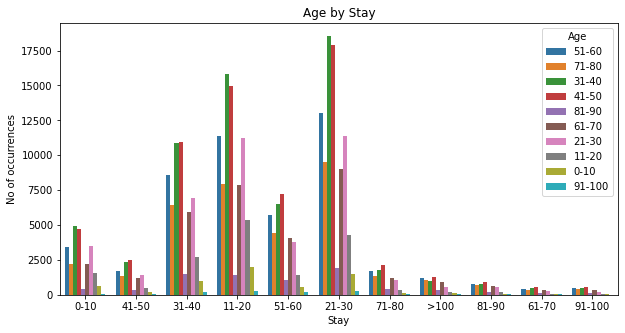

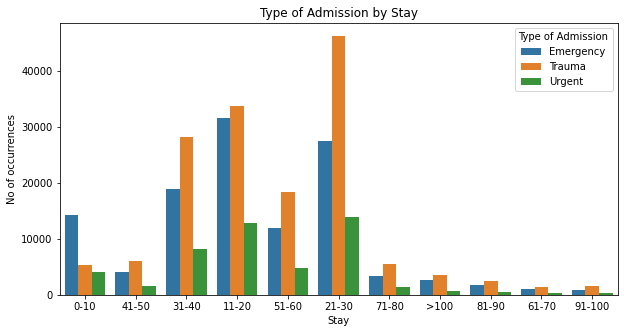

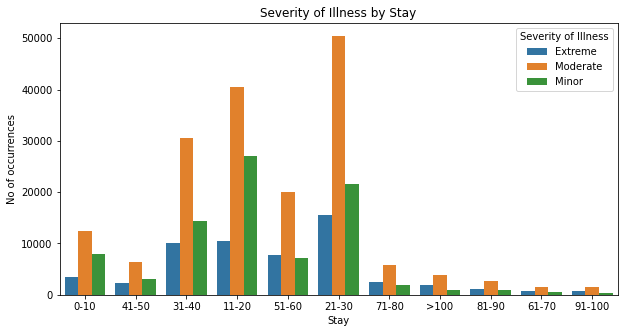

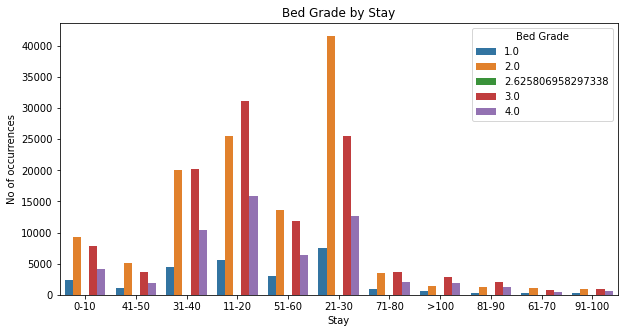

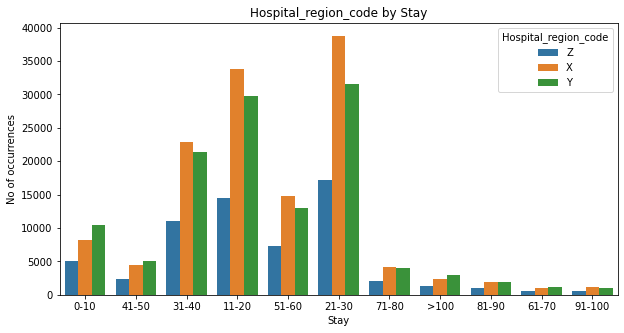

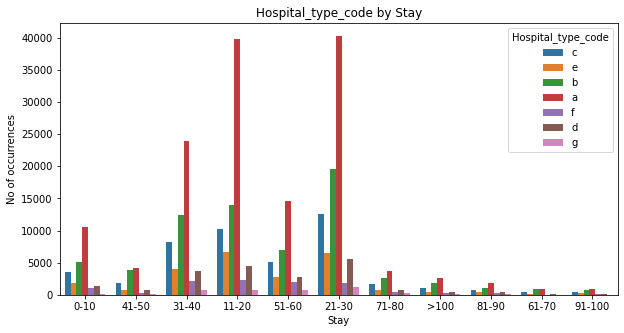

In [12]:


cat_cols = ['Department', 'Ward_Type', 'Ward_Facility_Code', 'Age', 'Type of Admission',
            'Severity of Illness', 'Bed Grade', 'Hospital_region_code', 'Hospital_type_code']

for col in cat_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x='Stay', hue=col, data=train_df, ax=ax)
    ax.set(xlabel='Stay', ylabel='No of occurrences', title=f'{col} by Stay')
    plt.show()


**Neumerical Features Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


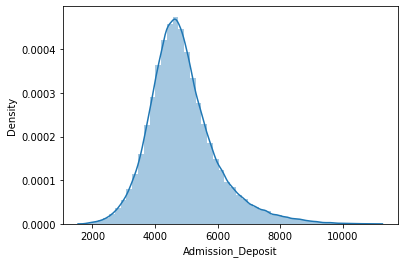

In [15]:
sns.distplot( train_df['Admission_Deposit'])

In [16]:
# Label encoding 

# get list of categorical features
cat_features = [column for column in train_df.columns if train_df[column].dtype == 'object']

# apply LabelEncoder to each categorical feature
for feature in cat_features:
    le = LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature].astype(str))


In [ ]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


**Test Data Analysis**

In [14]:
test_df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [18]:
test_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [21]:
#drop insignificant columns
test_df.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [22]:
# Select the columns with missing values
cols_with_na = ['Bed Grade', 'City_Code_Patient']

# Create a KNNImputer object with k=5 for Bed Grade and k=47 for City_Code_Patient 
# these values were determined by calculating sqaure root of missing values
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)  # k=5 for Bed Grade
imputer_city = KNNImputer(n_neighbors=47, missing_values=np.nan)  # k=47 for City_Code_Patient

# Impute missing values using KNN imputation
test_df['Bed Grade'] = imputer.fit_transform(test_df[['Bed Grade']])
test_df['City_Code_Patient'] = imputer_city.fit_transform(test_df[['City_Code_Patient']])

**Scalling**

In [32]:
df_num_train = train_df.select_dtypes([np.number])
from sklearn.preprocessing import StandardScaler
# For training Data
sc = StandardScaler()

num_scaled = sc.fit_transform(df_num_train)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num_train.columns)

In [34]:
df_num_test = test_df.select_dtypes([np.number])
num_scaled_test = sc.fit_transform(df_num_test)

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = df_num_test.columns)

**Train Test Split**

In [45]:
X = df_num_scaled.drop('Stay',axis=1)
y = df_num_scaled['Stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)